# Sorting Algorithms

In the first part implement the basic sorting algorithms 
1. In-place Quick Sort 
2. Merge Sort 
3. In-place Heap Sort 
4. Insertion Sort 
5. Bucket Sort 
6. Radix Sort. 

The pseudocode 
for a few algorithms are attached and the heap ADT is also given. Your implementation 
should follow the pseudo-code and use the ADT for heapsort. Generate multiple random 
input test cases of various sizes (e.g 100 (min), 500, 1000) and evaluate the different 
algorithms based on

## Analysis Parameters

1. Number of comparisons (if applicable) 
2. Number of swaps (if applicable) 
3. Number of basic operations (other than above) 
4. Running time in milliseconds  
5. Memory used

In [8]:
from time import time
from random import randint
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [9]:
# Analysis Parameters:

# 6 is the number of sorting algorithms
noOfComparisons = [-1 for i in range(6)]
noOfSwaps = [-1 for i in range(6)]
runningTime = [-1 for i in range(6)]
memoryUsage = [-1 for i in range(6)]


## In-place Quick Sort

In [10]:
# Randomized q selection. In-place quicksort.

def partition(arr, p, r):
    q = randint(p, r)
    if q != r:
        noOfSwaps[0] += 1
        arr[q], arr[r] = arr[r], arr[q]
    q = r
    i = p - 1
    for j in range(p, r):
        noOfComparisons[0] += 1
        if arr[j] <= arr[q]:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            noOfSwaps[0] += 1
    arr[i+1], arr[q] = arr[q], arr[i+1]
    noOfSwaps[0] += 1

    return i+1

def quickSort(arr, p, r):
    noOfComparisons[0] += 1
    if p < r:
        q = partition(arr, p, r)
        quickSort(arr, p, q-1)
        quickSort(arr, q+1, r)

## Merge Sort

In [11]:
# Merge sort.

def merge(arr, p, q, r):
    size_left = q - p + 1
    size_right = r - q
    left = [0 for i in range(size_left)]
    right = [0 for i in range(size_right)]

    for i in range(size_left):
        left[i] = arr[p + i]
    for j in range(size_right):
        right[j] = arr[q + j + 1]

    i = 0
    j = 0

    for k in range(p, r+1):
        noOfComparisons[1] += 1
        if i < size_left and j < size_right:
            noOfComparisons[1] += 1
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
                noOfSwaps[1] += 1
            else:
                arr[k] = right[j]
                j += 1
                noOfSwaps[1] += 1
        elif i < size_left:
            noOfComparisons[1] += 1
            arr[k] = left[i]
            i += 1
            noOfSwaps[1] += 1
        else:
            noOfComparisons[1] += 1
            arr[k] = right[j]
            j += 1
            noOfSwaps[1] += 1

def mergeSort(arr, p, r):
    noOfComparisons[1] += 1
    if p < r:
        q = (p + r) // 2
        mergeSort(arr, p, q)
        mergeSort(arr, q+1, r)
        merge(arr, p, q, r)


## In-place Heap Sort

In [12]:
# In-place Heap sort.

def maxHeapify(arr, i, heap_size):
    l = 2 * i + 1
    r = 2 * i + 2
    largest = i
    noOfComparisons[2] += 1
    if l < heap_size and arr[l] > arr[i]:
        largest = l
    noOfComparisons[2] += 1
    if r < heap_size and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        noOfSwaps[2] += 1
        maxHeapify(arr, largest, heap_size)

def buildMaxHeap(arr, heap_size):
    for i in range(heap_size//2, -1, -1):
        maxHeapify(arr, i, heap_size)

def heapSort(arr, heap_size):
    buildMaxHeap(arr, heap_size)
    for i in range(heap_size-1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        noOfSwaps[2] += 1
        heap_size -= 1
        maxHeapify(arr, 0, heap_size)

## Insertion Sort

In [13]:
def insertionSort(L):
    noOfComparisons[3] = 0
    if len(L) <= 1:
        return L
    
    for j in range(1, len(L)):
        key = L[j]
        i = j - 1
        while i >= 0 and L[i] > key:
            L[i + 1] = L[i]
            i -= 1
            noOfComparisons[3] += 1
            noOfSwaps[3] += 1
        L[i + 1] = key
        noOfSwaps[3] += 1
        noOfComparisons[3] += 1 # 1 for the last comparison

    return L
    

## Bucket Sort

In [14]:
# Bucket Sort
def insertionSortForBucket(L):
    noOfComparisons[4] = 0
    if len(L) <= 1:
        return L
    
    for j in range(1, len(L)):
        key = L[j]
        i = j - 1
        while i >= 0 and L[i] > key:
            L[i + 1] = L[i]
            i -= 1
            noOfComparisons[4] += 1
            noOfSwaps[4] += 1
        L[i + 1] = key
        noOfSwaps[4] += 1
        noOfComparisons[4] += 1 # 1 for the last comparison

    return L

def bucketSort(A):
    noOfComparisons[4] = 0
    noOfSwaps[4] = 0
    n = len(A)
    B = [[] for i in range(n)]
    for i in range(n):
        index = min(int(n * A[i]), n - 1)  # Clamp the index to be within [0, n-1]
        B[index].append(A[i])
        noOfSwaps[4] += 1
        noOfComparisons[4] += 1

    for i in range(n):
        insertionSort(B[i])

    k = 0
    for i in range(n):
        for j in range(len(B[i])):
            A[k] = B[i][j]
            k += 1
            noOfSwaps[4] += 1
            noOfComparisons[4] += 1

    return A


## Radix Sort

In [15]:
# Radix Sort with quick sort as the sorting algorithm for each digit.

def countSort(A, exp):
    n = len(A)
    B = [0 for i in range(n)]
    C = [0 for i in range(10)]

    # Counting the number of occurrences of each digit.
    for i in range(n):
        C[(A[i]//exp)%10] += 1
        noOfSwaps[5] += 1
        noOfComparisons[5] += 1

    # Calculating the cumulative sum of the counts.
    for i in range(1, 10):
        C[i] += C[i-1]
        noOfSwaps[5] += 1
        noOfComparisons[5] += 1

    # Sorting the array according to the digit.
    for i in range(n-1, -1, -1):
        B[C[(A[i]//exp)%10]-1] = A[i]
        C[(A[i]//exp)%10] -= 1
        noOfSwaps[5] += 1
        noOfComparisons[5] += 1

    # Copying the sorted array to the original array.
    for i in range(n):
        A[i] = B[i]
        noOfSwaps[5] += 1
        noOfComparisons[5] += 1

    return A


def radixSort(A):
    noOfComparisons[5] = 0
    noOfSwaps[5] = 0
    max_element = max(A)
    exp = 1
    while max_element // exp > 0:
        countSort(A, exp)
        exp *= 10

    return A

# Observation and Analysis

In [2]:
# Analyze all 6 algorithms for input sizes 100, 500, 1000, 10000.

# Input sizes.
input_sizes = [100, 500, 1000, 5000]

"""
Algorithms:
1. Randomized pivot selection. In-place quicksort.
2. Merge sort.
3. In-place Heap sort.
4. Insertion sort.
5. Bucket sort.
6. Radix sort.
"""


'\nAlgorithms:\n1. Randomized pivot selection. In-place quicksort.\n2. Merge sort.\n3. In-place Heap sort.\n4. Insertion sort.\n5. Bucket sort.\n6. Radix sort.\n'

# Already sorted input Analysis

Analysing the algorithms for sorted input.

In [3]:
sorted_input = [[] for i in range(4)]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

Analysing the algorithms for sorted input.
Ploting graphs combining all the algorithms for each input size.

```
X-axis: Input size
Y-axis: Number of comparisons
```

In [4]:
noOfComparisons_data = [[0 for i in range(6)] for i in range(4)]
noOfSwaps_data = [[0 for i in range(6)] for i in range(4)]
runningTime_data = [[0 for i in range(6)] for i in range(4)]
memoryUsage_data = [[0 for i in range(6)] for i in range(4)]

# Randomized pivot selection. In-place quicksort.
for i in range(4):
    noOfComparisons[0] = 0
    noOfSwaps[0] = 0
    start = time()
    memoryUsage[0] = sys.getsizeof(quickSort(sorted_input[i], 0, len(sorted_input[i])-1))
    end = time()
    noOfComparisons_data[i][0] = noOfComparisons[0]
    noOfSwaps_data[i][0] = noOfSwaps[0]
    runningTime[0] = end - start
    runningTime_data[i][0] = runningTime[0]
    memoryUsage_data[i][0] = memoryUsage[0]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

# Merge sort.
for i in range(4):
    noOfComparisons[1] = 0
    noOfSwaps[1] = 0
    start = time()
    memoryUsage[1] = sys.getsizeof(mergeSort(sorted_input[i], 0, len(sorted_input[i])-1))
    end = time()
    noOfComparisons_data[i][1] = noOfComparisons[1]
    noOfSwaps_data[i][1] = noOfSwaps[1]
    runningTime[1] = end - start
    runningTime_data[i][1] = runningTime[1]
    memoryUsage_data[i][1] = memoryUsage[1]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

# In-place Heap sort.
for i in range(4):
    noOfComparisons[2] = 0
    noOfSwaps[2] = 0
    start = time()
    memoryUsage[2] = sys.getsizeof(heapSort(sorted_input[i], len(sorted_input[i])))
    end = time()
    noOfComparisons_data[i][2] = noOfComparisons[2]
    noOfSwaps_data[i][2] = noOfSwaps[2]
    runningTime[2] = end - start
    runningTime_data[i][2] = runningTime[2]
    memoryUsage_data[i][2] = memoryUsage[2]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

# Insertion sort.
for i in range(4):
    noOfComparisons[3] = 0
    noOfSwaps[3] = 0
    start = time()
    memoryUsage[3] = sys.getsizeof(insertionSort(sorted_input[i]))
    end = time()
    noOfComparisons_data[i][3] = noOfComparisons[3]
    noOfSwaps_data[i][3] = noOfSwaps[3]
    runningTime[3] = end - start
    runningTime_data[i][3] = runningTime[3]
    memoryUsage_data[i][3] = memoryUsage[3]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

# Bucket sort.
for i in range(4):
    noOfComparisons[4] = 0
    noOfSwaps[4] = 0
    start = time()
    memoryUsage[4] = sys.getsizeof(bucketSort(sorted_input[i]))
    end = time()
    noOfComparisons_data[i][4] = noOfComparisons[4]
    noOfSwaps_data[i][4] = noOfSwaps[4]
    runningTime[4] = end - start
    runningTime_data[i][4] = runningTime[4]
    memoryUsage_data[i][4] = memoryUsage[4]

for i in range(4):
    sorted_input[i] = [j for j in range(input_sizes[i])]

# Radix sort.
for i in range(4):
    noOfComparisons[5] = 0
    noOfSwaps[5] = 0
    start = time()
    memoryUsage[5] = sys.getsizeof(radixSort(sorted_input[i]))
    end = time()
    noOfComparisons_data[i][5] = noOfComparisons[5]
    noOfSwaps_data[i][5] = noOfSwaps[5]
    runningTime[5] = end - start
    runningTime_data[i][5] = runningTime[5]
    memoryUsage_data[i][5] = memoryUsage[5]

NameError: name 'noOfComparisons' is not defined

In [19]:
# Plotting the graphs.

df_1_comparison = pd.DataFrame(noOfComparisons_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_1_comparison.insert(0, "Input size", input_sizes, True)
df_1_comparison


,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,719,1543,1382,99,200,618
1,500,5787,9975,9210,499,1000,4527
2,1000,12102,21951,20418,999,2000,9027
3,5000,78654,133615,126866,4999,10000,60036


<Axes: title={'center': 'Number of comparisons for different sorting algorithms for different input sizes of already sorted input.'}, xlabel='Input size'>

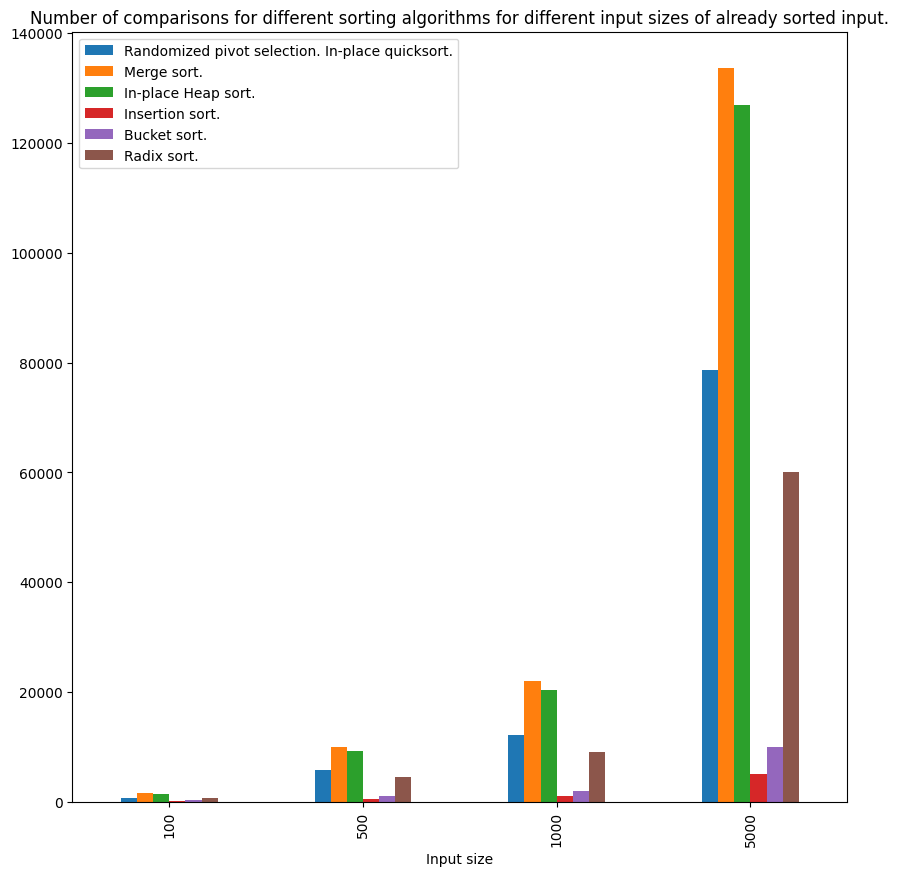

In [20]:
# Plot df. Multiple bar plots in one figure.

df_1_comparison.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of comparisons for different sorting algorithms for different input sizes of already sorted input.")

In [21]:
df_1_swaps = pd.DataFrame(noOfSwaps_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_1_swaps.insert(0, "Input size", input_sizes, True)

df_1_swaps

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,454,672,640,99,200,618
1,500,3011,4488,4354,499,1000,4527
2,1000,6573,9976,9708,999,2000,9027
3,5000,45067,61808,60932,4999,10000,60036


<Axes: title={'center': 'Number of swaps for different sorting algorithms for different input sizes of already sorted input.'}, xlabel='Input size'>

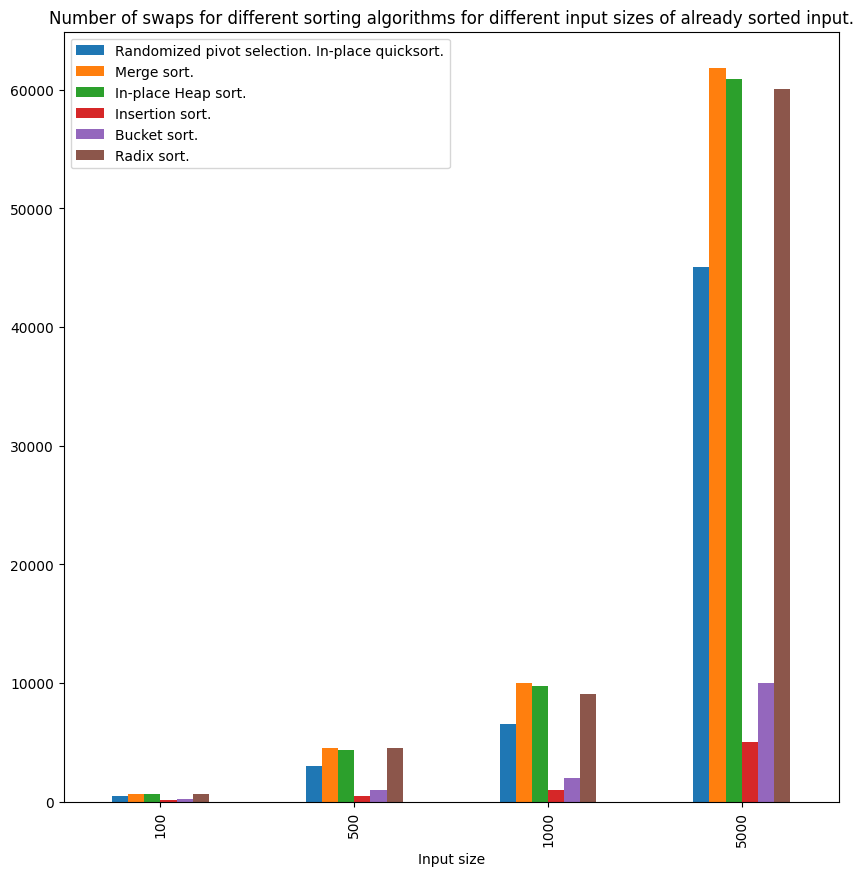

In [22]:
# Plot df. Multiple bar plots in one figure.

df_1_swaps.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of swaps for different sorting algorithms for different input sizes of already sorted input.")

In [23]:
df_1_runningTime = pd.DataFrame(runningTime_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_1_runningTime.insert(0, "Input size", input_sizes, True)

df_1_runningTime


,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,0.000232,0.000221,0.000201,0.000018,0.000067,0.000087
1,500,0.000802,0.001372,0.001321,0.000066,0.000316,0.000587
2,1000,0.001666,0.002845,0.003051,0.000134,0.000654,0.001181
3,5000,0.010092,0.016330,0.018699,0.000691,0.003271,0.008070


<Axes: title={'center': 'Running time for different sorting algorithms for different input sizes of already sorted input.'}, xlabel='Input size'>

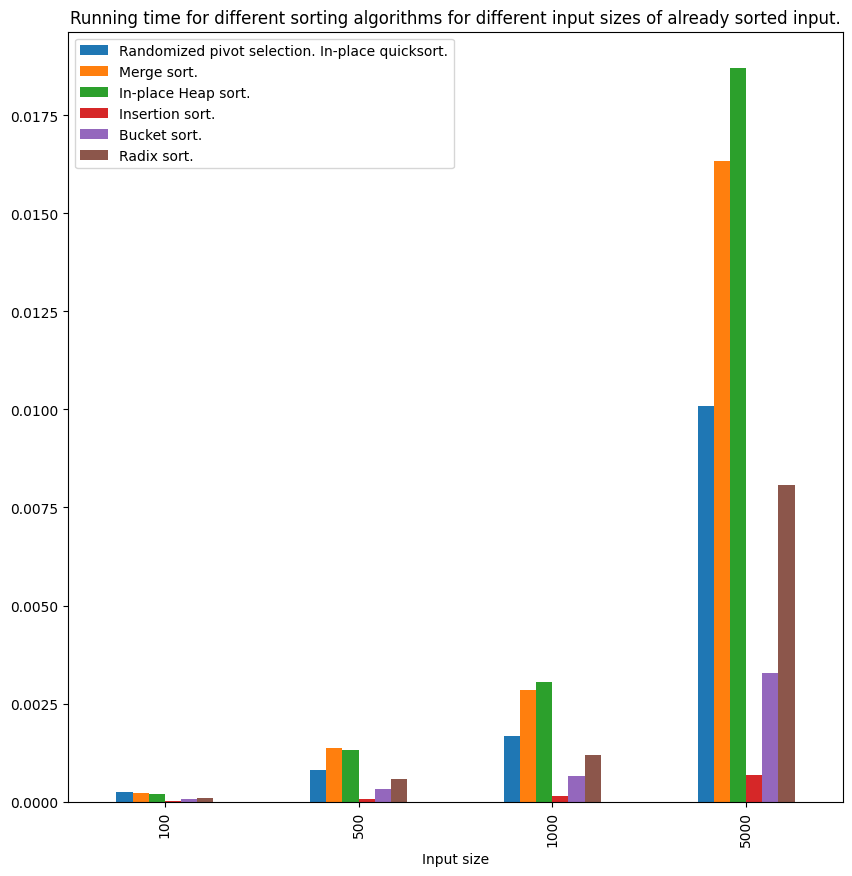

In [24]:
# Plot df. Multiple bar plots in one figure.

df_1_runningTime.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Running time for different sorting algorithms for different input sizes of already sorted input.")

In [25]:
df_1_memoryUsage = pd.DataFrame(memoryUsage_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_1_memoryUsage.insert(0, "Input size", input_sizes, True)

df_1_memoryUsage

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,16,16,16,920,920,920
1,500,16,16,16,4216,4216,4216
2,1000,16,16,16,8856,8856,8856
3,5000,16,16,16,41880,41880,41880


<Axes: title={'center': 'Memory usage for different sorting algorithms for different input sizes of already sorted input.'}, xlabel='Input size'>

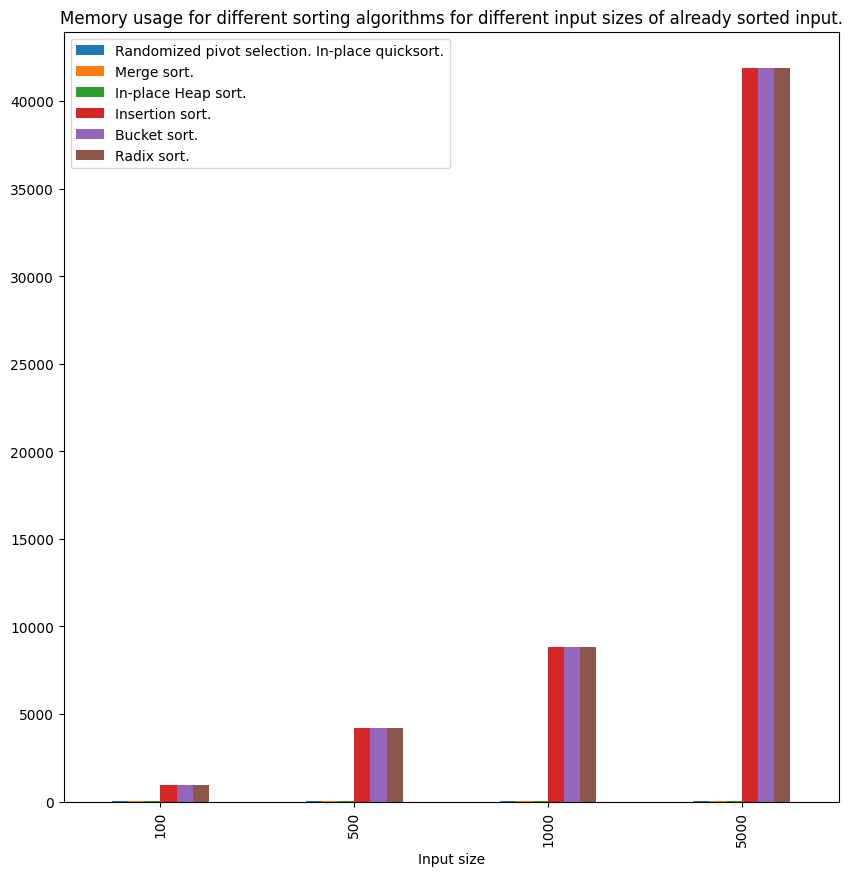

In [26]:
# Plot df. Multiple bar plots in one figure.

df_1_memoryUsage.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Memory usage for different sorting algorithms for different input sizes of already sorted input.")

## Observation (Sorted Input)

### Number of comparisons

1. Insertion sort has the least number of comparisons.
2. Merge sort has the highest number of comparisons across all input sizes.

### Number of swaps

1. Insertion sort has the least number of swaps.
2. Merge sort has the highest number of swaps across all input sizes.

### Running time in milliseconds

1. Insertion sort has the least running time.
2. In-place Heap Sort has the highest running time across all input sizes.

### Memory used

1. Insertion, Radix, Bucker sort has comparitively greater memory usage when compared to other algorithms.
2. Merge, In-place Heap Sort and In-Place Quick Sort has comparitively lesser memory usage when compared to other algorithms.


## Analysis

`Heap Sort > Merge Sort > Quick Sort > Radix Sort > Bucket Sort >>> Insertion Sort`

1. Insertion sort is the best algorithm for already sorted input.
2. Merge sort, In-Place Heap Sort is the worst algorithm for already sorted input.


# Reversed sorted input Analysis

Analysing the algorithms for reversed sorted input.

In [27]:
reverse_sorted_input = [[] for i in range(4)]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]

In [28]:


noOfComparisons_data = [[0 for i in range(6)] for i in range(4)]
noOfSwaps_data = [[0 for i in range(6)] for i in range(4)]
runningTime_data = [[0 for i in range(6)] for i in range(4)]
memoryUsage_data = [[0 for i in range(6)] for i in range(4)]

# Randomized pivot selection. In-place quicksort.
for i in range(4):
    noOfComparisons[0] = 0
    noOfSwaps[0] = 0
    start = time()
    memoryUsage[0] = sys.getsizeof(quickSort(reverse_sorted_input[i], 0, len(reverse_sorted_input[i])-1))
    end = time()
    noOfComparisons_data[i][0] = noOfComparisons[0]
    noOfSwaps_data[i][0] = noOfSwaps[0]
    runningTime[0] = end - start
    runningTime_data[i][0] = runningTime[0]
    memoryUsage_data[i][0] = memoryUsage[0]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]

# Merge sort.
for i in range(4):
    noOfComparisons[1] = 0
    noOfSwaps[1] = 0
    start = time()
    memoryUsage[1] = sys.getsizeof(mergeSort(reverse_sorted_input[i], 0, len(reverse_sorted_input[i])-1))
    end = time()
    noOfComparisons_data[i][1] = noOfComparisons[1]
    noOfSwaps_data[i][1] = noOfSwaps[1]
    runningTime[1] = end - start
    runningTime_data[i][1] = runningTime[1]
    memoryUsage_data[i][1] = memoryUsage[1]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]

# In-place Heap sort.
for i in range(4):
    noOfComparisons[2] = 0
    noOfSwaps[2] = 0
    start = time()
    memoryUsage[2] = sys.getsizeof(heapSort(reverse_sorted_input[i], len(reverse_sorted_input[i])))
    end = time()
    noOfComparisons_data[i][2] = noOfComparisons[2]
    noOfSwaps_data[i][2] = noOfSwaps[2]
    runningTime[2] = end - start
    runningTime_data[i][2] = runningTime[2]
    memoryUsage_data[i][2] = memoryUsage[2]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]

# Insertion sort.
for i in range(4):
    noOfComparisons[3] = 0
    noOfSwaps[3] = 0
    start = time()
    memoryUsage[3] = sys.getsizeof(insertionSort(reverse_sorted_input[i]))
    end = time()
    noOfComparisons_data[i][3] = noOfComparisons[3]
    noOfSwaps_data[i][3] = noOfSwaps[3]
    runningTime[3] = end - start
    runningTime_data[i][3] = runningTime[3]
    memoryUsage_data[i][3] = memoryUsage[3]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]


# Bucket sort.
for i in range(4):
    noOfComparisons[4] = 0
    noOfSwaps[4] = 0
    start = time()
    memoryUsage[4] = sys.getsizeof(bucketSort(reverse_sorted_input[i]))
    end = time()
    noOfComparisons_data[i][4] = noOfComparisons[4]
    noOfSwaps_data[i][4] = noOfSwaps[4]
    runningTime[4] = end - start
    runningTime_data[i][4] = runningTime[4]
    memoryUsage_data[i][4] = memoryUsage[4]

for i in range(4):
    reverse_sorted_input[i] = [j for j in range(input_sizes[i]-1, -1, -1)]

# Radix sort.
for i in range(4):
    noOfComparisons[5] = 0
    noOfSwaps[5] = 0
    start = time()
    memoryUsage[5] = sys.getsizeof(radixSort(reverse_sorted_input[i]))
    end = time()
    noOfComparisons_data[i][5] = noOfComparisons[5]
    noOfSwaps_data[i][5] = noOfSwaps[5]
    runningTime[5] = end - start
    runningTime_data[i][5] = runningTime[5]
    memoryUsage_data[i][5] = memoryUsage[5]



In [29]:
df_2_comparisons = pd.DataFrame(noOfComparisons_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_2_comparisons.insert(0, "Input size", input_sizes, True)

df_2_comparisons


,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,799,1543,1134,5049,200,618
1,500,5512,9975,7854,125249,1000,4527
2,1000,11577,21951,17634,500499,2000,9027
3,5000,74143,133615,111874,12502499,10000,60036


<Axes: title={'center': 'Number of comparisons for different sorting algorithms for different input sizes of reverse sorted input.'}, xlabel='Input size'>

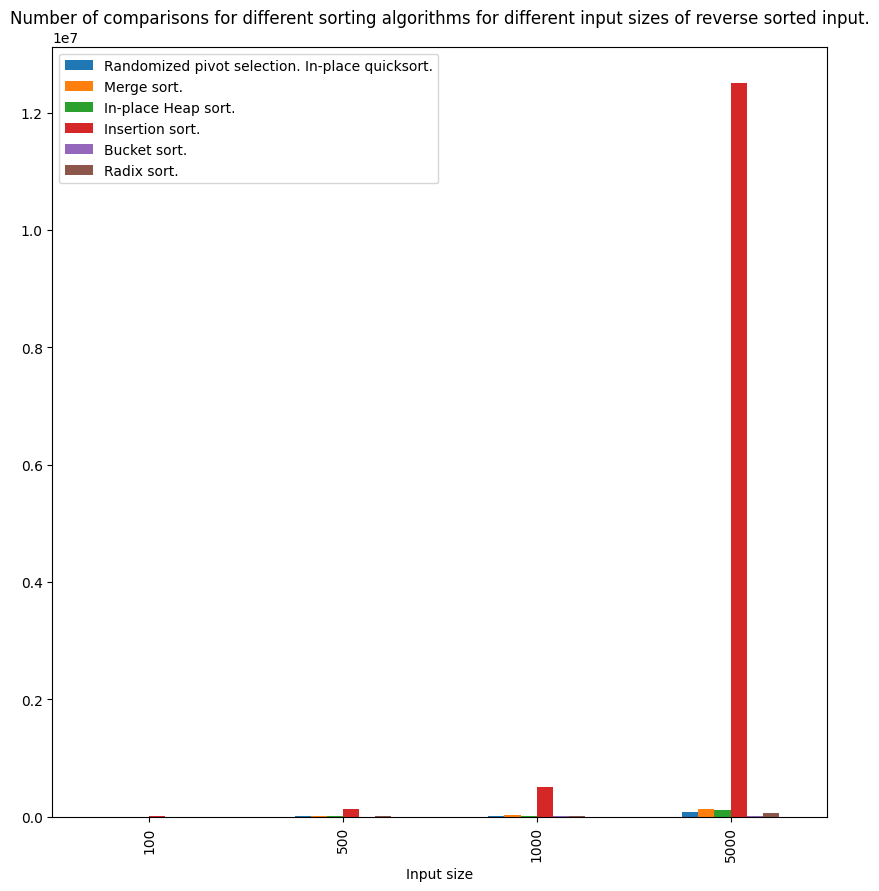

In [30]:
df_2_comparisons.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of comparisons for different sorting algorithms for different input sizes of reverse sorted input.")

In [31]:
df_2_swaps = pd.DataFrame(noOfSwaps_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_2_swaps.insert(0, "Input size", input_sizes, True)

df_2_swaps

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,410,672,516,5049,200,618
1,500,3202,4488,3676,125249,1000,4527
2,1000,6118,9976,8316,500499,2000,9027
3,5000,40558,61808,53436,12502499,10000,60036


<Axes: title={'center': 'Number of swaps for different sorting algorithms for different input sizes of reverse sorted input.'}, xlabel='Input size'>

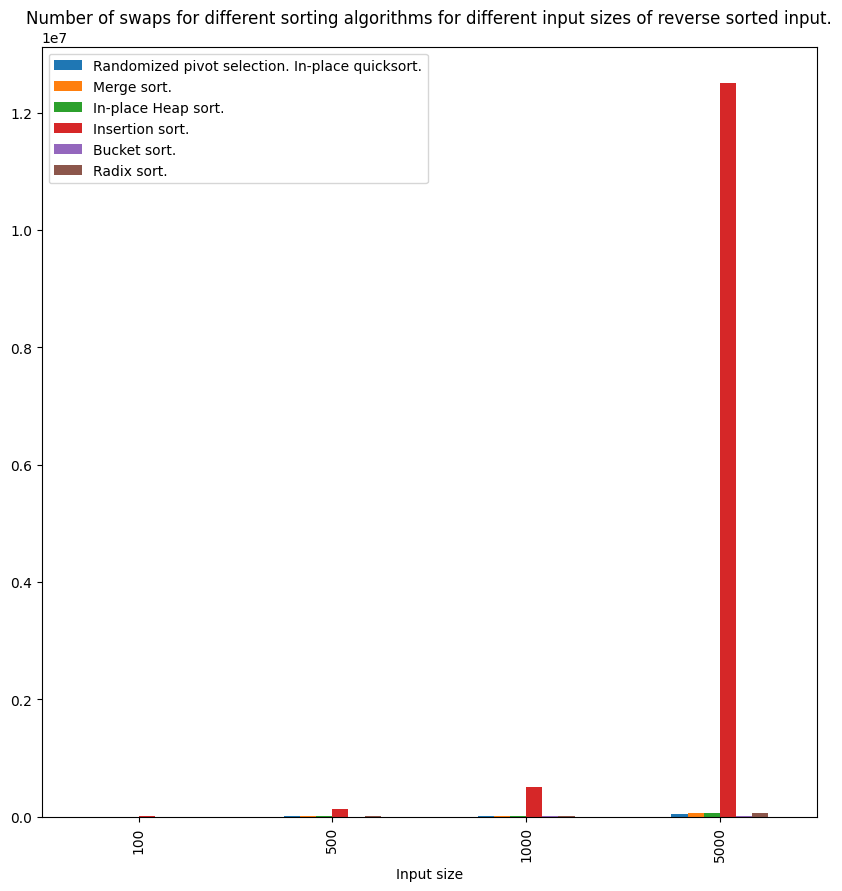

In [32]:
df_2_swaps.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of swaps for different sorting algorithms for different input sizes of reverse sorted input.")

In [33]:
df_2_runningTime = pd.DataFrame(runningTime_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_2_runningTime.insert(0, "Input size", input_sizes, True)

df_2_runningTime

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,0.000128,0.000226,0.000169,0.000595,0.000576,0.000083
1,500,0.000795,0.001454,0.001112,0.014843,0.013640,0.000558
2,1000,0.001927,0.002852,0.002534,0.058887,0.055513,0.001105
3,5000,0.009911,0.016658,0.016608,1.428108,1.419513,0.007569


<Axes: title={'center': 'Running time for different sorting algorithms for different input sizes of reverse sorted input.'}, xlabel='Input size'>

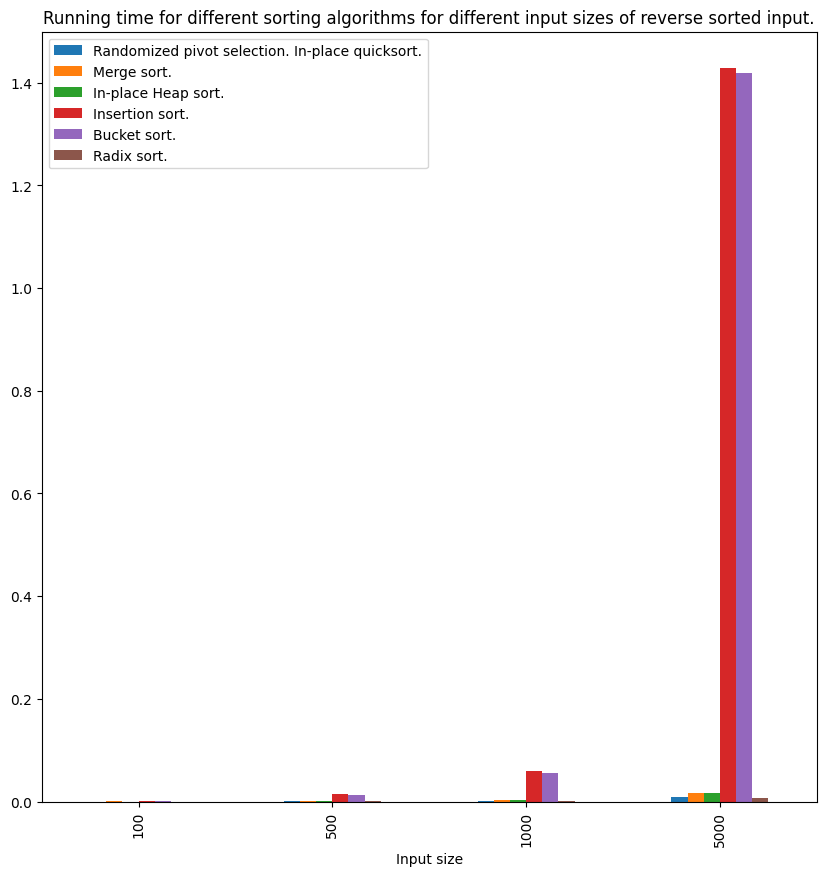

In [34]:
df_2_runningTime.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Running time for different sorting algorithms for different input sizes of reverse sorted input.")


In [35]:
df_2_memoryUsage = pd.DataFrame(memoryUsage_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

# Add a column with the input sizes as the first column.
df_2_memoryUsage.insert(0, "Input size", input_sizes, True)

df_2_memoryUsage

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,16,16,16,920,920,920
1,500,16,16,16,4216,4216,4216
2,1000,16,16,16,8856,8856,8856
3,5000,16,16,16,41880,41880,41880


<Axes: title={'center': 'Memory usage for different sorting algorithms for different input sizes of reverse sorted input.'}, xlabel='Input size'>

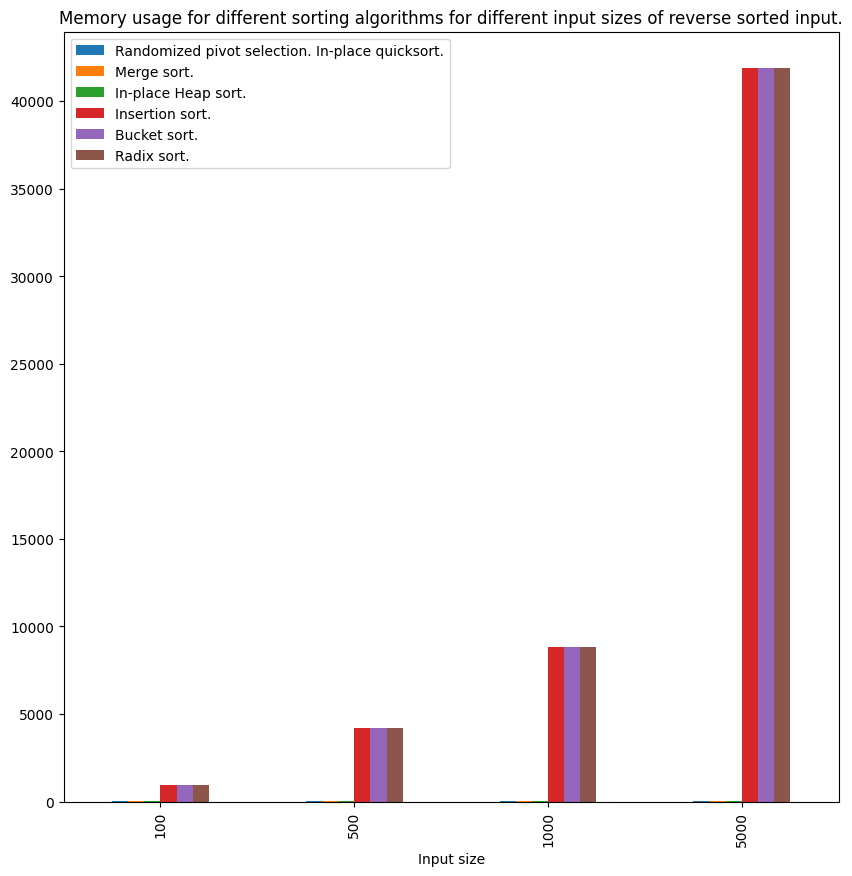

In [36]:
df_2_memoryUsage.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Memory usage for different sorting algorithms for different input sizes of reverse sorted input.")

## Observation (Reversed sorted input)

### Number of comparisons

1. Insertion sort has the highest number of comparisons.
2. All other algorithms have similar number of comparisons across all input sizes which is very small when compared to Insertion sort.

### Number of swaps

1. Insertion sort has the highest number of swaps.
2. All other algorithms have similar number of swaps across all input sizes which is very small when compared to Insertion sort.

### Running time in milliseconds

1. Insertion Sort and Bucket Sort have significantly higher running time.
2. All other algorithms have similar running time across all input sizes which is very small when compared to Insertion sort.

## Final Analysis

`Insertion Sort > Bucket Sort >>> Heap Sort > Merge Sort > Quick Sort > Radix Sort`

1. Insertion sort, Bucket sort are the worst algorithms for reversed sorted input.
3. Radix Sort is the best algorithm for reverse sorted input.

# Randomized input Analysis

Analysing the algorithms for randomized input.

In [37]:
random_input = [[] for i in range(4)]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

In [38]:
noOfComparisons_data = [[0 for i in range(6)] for i in range(4)]
noOfSwaps_data = [[0 for i in range(6)] for i in range(4)]
runningTime_data = [[0 for i in range(6)] for i in range(4)]
memoryUsage_data = [[0 for i in range(6)] for i in range(4)]

# Randomized pivot selection. In-place quicksort.
for i in range(4):
    noOfComparisons[0] = 0
    noOfSwaps[0] = 0
    start = time()
    memoryUsage[0] = sys.getsizeof(quickSort(random_input[i], 0, len(random_input[i])-1))
    end = time()
    noOfComparisons_data[i][0] = noOfComparisons[0]
    noOfSwaps_data[i][0] = noOfSwaps[0]
    runningTime[0] = end - start
    runningTime_data[i][0] = runningTime[0]
    memoryUsage_data[i][0] = memoryUsage[0]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

# Merge sort.
for i in range(4):
    noOfComparisons[1] = 0
    noOfSwaps[1] = 0
    start = time()
    memoryUsage[1] = sys.getsizeof(mergeSort(random_input[i], 0, len(random_input[i])-1))
    end = time()
    noOfComparisons_data[i][1] = noOfComparisons[1]
    noOfSwaps_data[i][1] = noOfSwaps[1]
    runningTime[1] = end - start
    runningTime_data[i][1] = runningTime[1]
    memoryUsage_data[i][1] = memoryUsage[1]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

# In-place Heap sort.
for i in range(4):
    noOfComparisons[2] = 0
    noOfSwaps[2] = 0
    start = time()
    memoryUsage[2] = sys.getsizeof(heapSort(random_input[i], len(random_input[i])))
    end = time()
    noOfComparisons_data[i][2] = noOfComparisons[2]
    noOfSwaps_data[i][2] = noOfSwaps[2]
    runningTime[2] = end - start
    runningTime_data[i][2] = runningTime[2]
    memoryUsage_data[i][2] = memoryUsage[2]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

# Insertion sort.
for i in range(4):
    noOfComparisons[3] = 0
    noOfSwaps[3] = 0
    start = time()
    memoryUsage[3] = sys.getsizeof(insertionSort(random_input[i]))
    end = time()
    noOfComparisons_data[i][3] = noOfComparisons[3]
    noOfSwaps_data[i][3] = noOfSwaps[3]
    runningTime[3] = end - start
    runningTime_data[i][3] = runningTime[3]
    memoryUsage_data[i][3] = memoryUsage[3]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

# Bucket sort.
for i in range(4):
    noOfComparisons[4] = 0
    noOfSwaps[4] = 0
    start = time()
    memoryUsage[4] = sys.getsizeof(bucketSort(random_input[i]))
    end = time()
    noOfComparisons_data[i][4] = noOfComparisons[4]
    noOfSwaps_data[i][4] = noOfSwaps[4]
    runningTime[4] = end - start
    runningTime_data[i][4] = runningTime[4]
    memoryUsage_data[i][4] = memoryUsage[4]

for i in range(4):
    random_input[i] = [randint(0, input_sizes[i]) for j in range(input_sizes[i])]

# Radix sort.
for i in range(4):
    noOfComparisons[5] = 0
    noOfSwaps[5] = 0
    start = time()
    memoryUsage[5] = sys.getsizeof(radixSort(random_input[i]))
    end = time()
    noOfComparisons_data[i][5] = noOfComparisons[5]
    noOfSwaps_data[i][5] = noOfSwaps[5]
    runningTime[5] = end - start
    runningTime_data[i][5] = runningTime[5]
    memoryUsage_data[i][5] = memoryUsage[5]

In [39]:
df_3_comparison = pd.DataFrame(noOfComparisons_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

df_3_comparison.insert(0, "Input size", input_sizes, True)

df_3_comparison

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,753,1543,1262,2550,200,618
1,500,5751,9975,8570,62321,1000,4527
2,1000,13274,21951,19144,258679,2000,12036
3,5000,77352,133615,119182,6229212,10000,60036


<Axes: title={'center': 'Number of comparisons for different sorting algorithms for different input sizes of random input.'}, xlabel='Input size'>

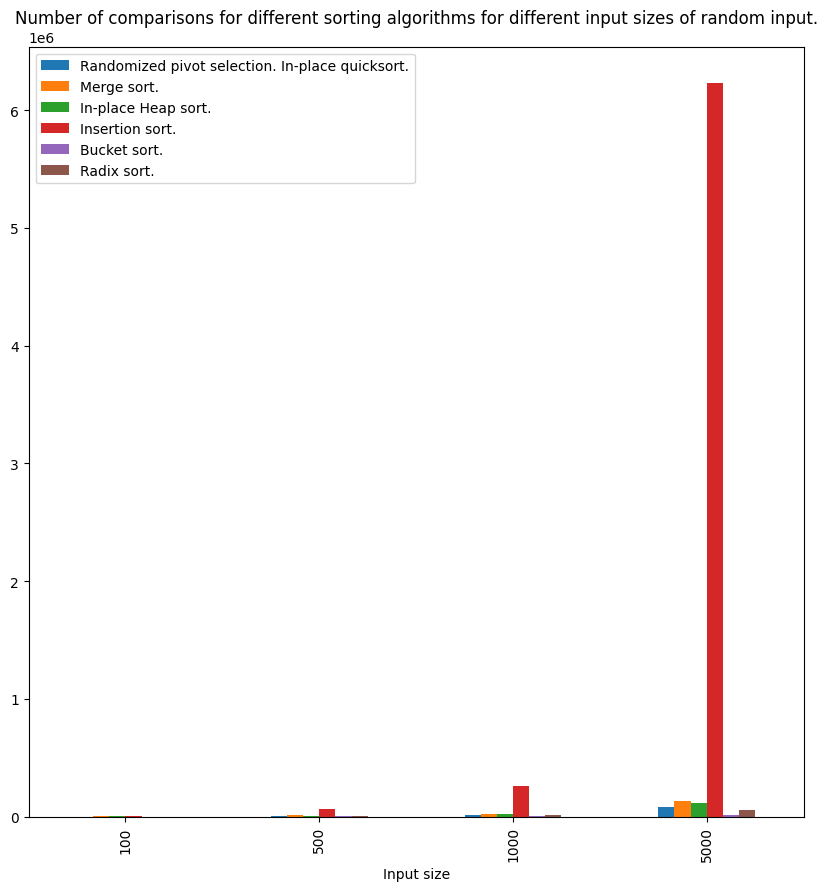

In [40]:
df_3_comparison.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of comparisons for different sorting algorithms for different input sizes of random input.")


In [41]:
df_3_swaps = pd.DataFrame(noOfSwaps_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

df_3_swaps.insert(0, "Input size", input_sizes, True)

df_3_swaps

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,460,672,580,2550,200,618
1,500,2985,4488,4034,62321,1000,4527
2,1000,7039,9976,9071,258679,2000,12036
3,5000,39512,61808,57090,6229212,10000,60036


<Axes: title={'center': 'Number of swaps for different sorting algorithms for different input sizes of random input.'}, xlabel='Input size'>

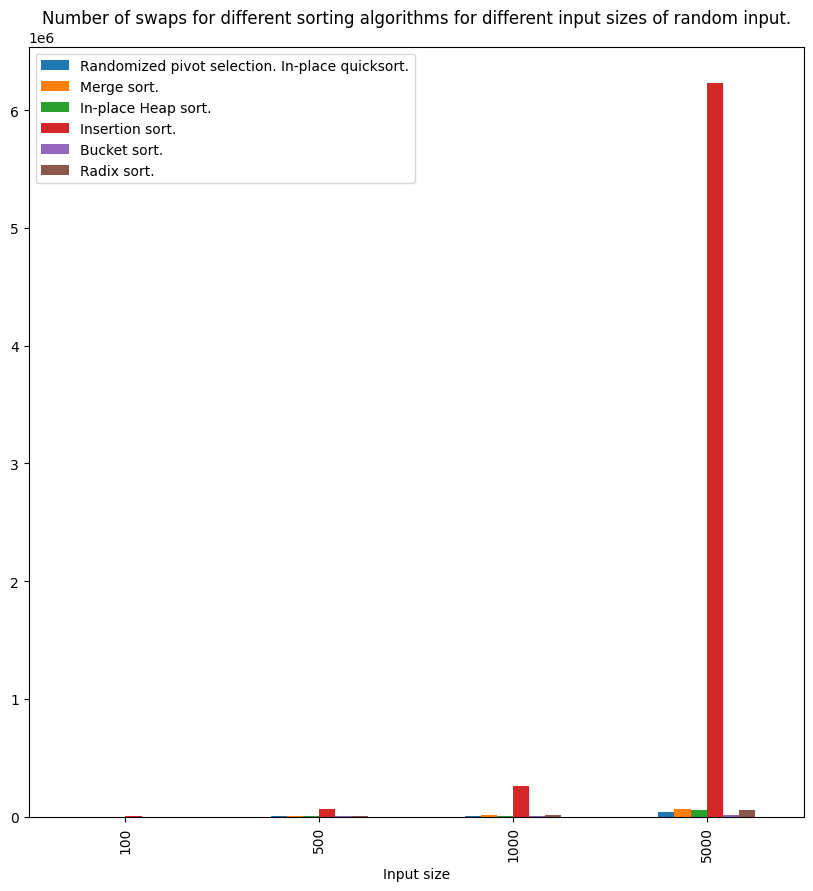

In [42]:
df_3_swaps.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Number of swaps for different sorting algorithms for different input sizes of random input.")

In [43]:
df_3_runningTime = pd.DataFrame(runningTime_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

df_3_runningTime.insert(0, "Input size", input_sizes, True)

df_3_runningTime

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,0.000133,0.000228,0.000185,0.000305,0.000316,0.000090
1,500,0.000908,0.001325,0.001251,0.007579,0.007559,0.000619
2,1000,0.001860,0.003000,0.002960,0.029930,0.029356,0.001548
3,5000,0.010565,0.017449,0.017973,0.757294,0.760989,0.007896


<Axes: title={'center': 'Running time for different sorting algorithms for different input sizes of random input.'}, xlabel='Input size'>

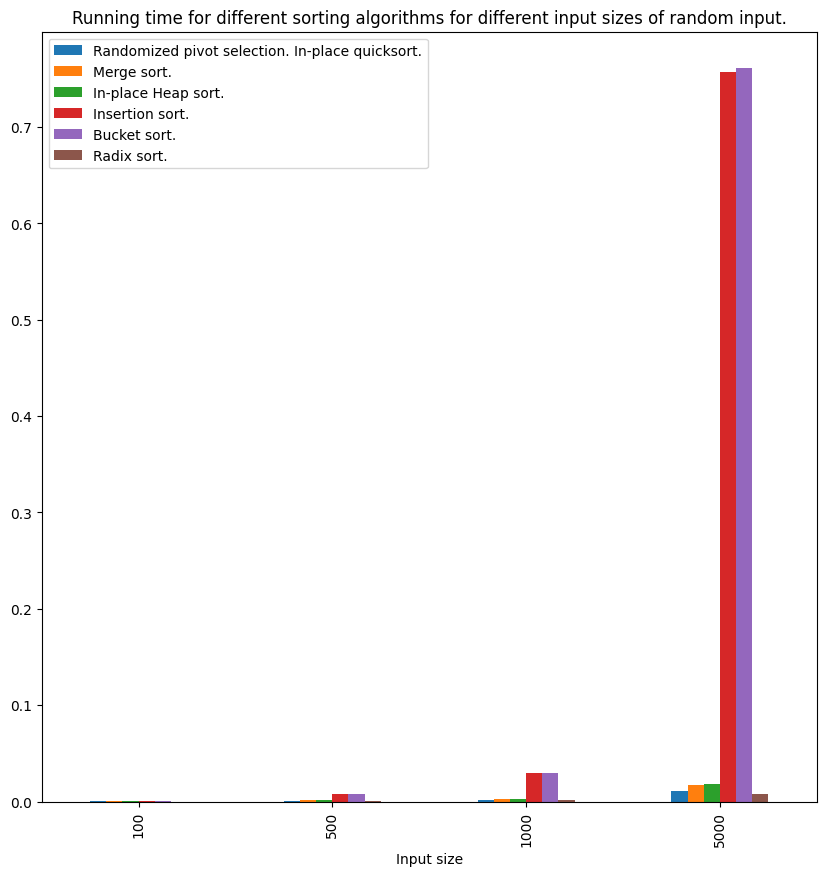

In [44]:
df_3_runningTime.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Running time for different sorting algorithms for different input sizes of random input.")

In [45]:
df_3_memoryUsage = pd.DataFrame(memoryUsage_data, columns = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'])

df_3_memoryUsage.insert(0, "Input size", input_sizes, True)

df_3_memoryUsage

,Input size,Randomized pivot selection. In-place quicksort.,Merge sort.,In-place Heap sort.,Insertion sort.,Bucket sort.,Radix sort.
0,100,16,16,16,920,920,920
1,500,16,16,16,4216,4216,4216
2,1000,16,16,16,8856,8856,8856
3,5000,16,16,16,41880,41880,41880


<Axes: title={'center': 'Memory usage for different sorting algorithms for different input sizes of random input.'}, xlabel='Input size'>

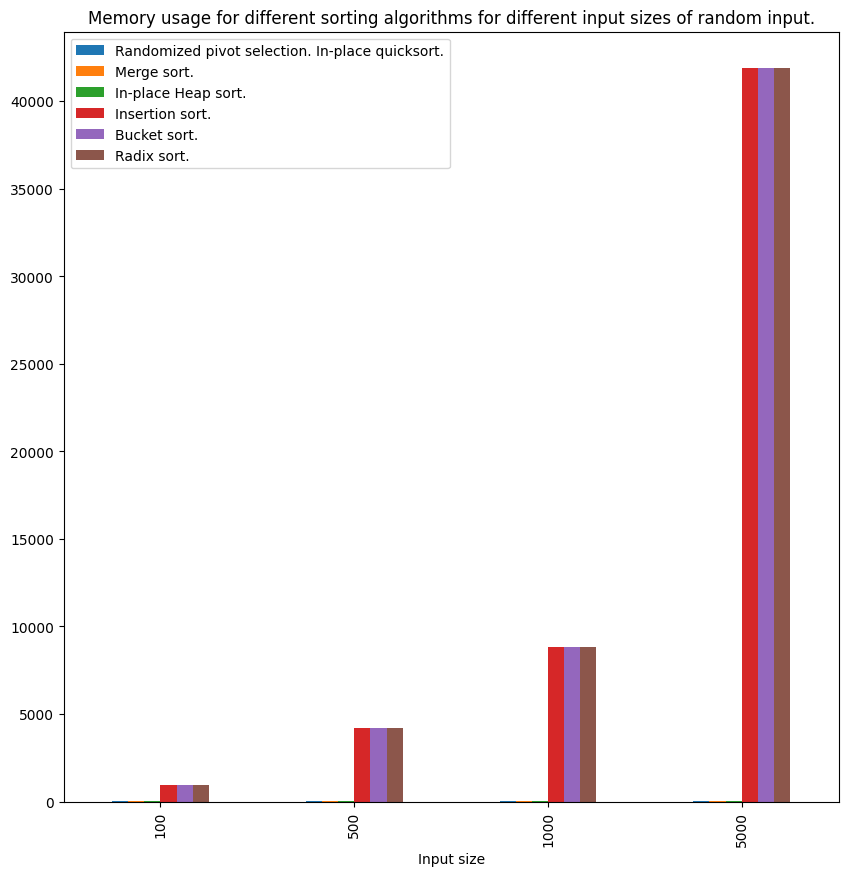

In [46]:
df_3_memoryUsage.plot(x = "Input size", y = ['Randomized pivot selection. In-place quicksort.', 'Merge sort.', 'In-place Heap sort.', 'Insertion sort.', 'Bucket sort.', 'Radix sort.'], kind = "bar", figsize = (10, 10), title = "Memory usage for different sorting algorithms for different input sizes of random input.")

## Observation (Randomized input)

### Number of comparisons

1. Insertion sort has the highest number of comparisons.
2. All other algorithms have similar number of comparisons across all input sizes which is very small when compared to Insertion sort.

### Number of swaps

1. Insertion sort has the highest number of swaps.
2. All other algorithms have similar number of swaps across all input sizes which is very small when compared to Insertion sort.

### Running time in milliseconds

1. Bucket sort has the highest running time unlike the reversed sorted input.
2. Insertion sort has the second highest running time.

## Final Analysis

`Bucket > Insertion >>> Heap > Merge > Quick > Radix`

1. Bucket and Insertion sort are the worst algorithms for randomized input.
2. Radix sort is the best algorithm for randomized input.
3. Quick Sort and Heap Sort are the second best algorithms for randomized input.
4. Merge Sort is the third best algorithm for randomized input followed by Heap Sort.

# Conclusion

1. Insertion sort is the best algorithm for already sorted input followed by Bucket Sort.
2. In-place Heap Sort the worst algorithm for already sorted input.
3. Insertion sort, Bucket sort are the worst algorithms for reversed sorted input.
4. Radix Sort is the best algorithm for reverse sorted input.
5. Bucket and Insertion sort are the worst algorithms for randomized input.
6. Radix sort is the best algorithm for randomized input.
7. Quick Sort and Heap Sort are the second best algorithms for randomized input.
8. Merge Sort is the third best algorithm for randomized input followed by Heap Sort.


# References

[1.] `THOMAS H. CORMEN, CHARLES E. LEISERSON, RONALD L. RIVEST & CLIFFORD STEIN: Introduction to Algorithms, 3rd ed. February, 2009`